<a href="https://colab.research.google.com/github/nBeliy-01/Neural-networks/blob/master/LR_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>Лабораторна робота №3</h1>
    <h3>Студетна групи АнД - 31</h3>
    <h3>Білухи Назара Романовича</h3>
    <h3>Варіант 1</h3>

## Імпорт необхідних бібліотек та модулів

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics

# Data for Linear Regression

In [ ]:
# GENERATE DATA FOR REGRESSION
def load_regression_data(noise_param):
    
    from sklearn.datasets import make_regression
    
    data, target = make_regression(
        n_samples = 100000,
        n_features = 29,
        noise = noise_param
    )

    # SPLIT TRAIN AND TEST DATA
    train_set_x, test_set_x, train_set_y, test_set_y = train_test_split(data, target, test_size = 0.25)

    train_set_y = train_set_y.reshape((train_set_y.shape[0], 1))
    test_set_y = test_set_y.reshape((test_set_y.shape[0], 1))

    return train_set_x, test_set_x, train_set_y, test_set_y

In [ ]:
train_set_x, test_set_x, train_set_y, test_set_y = load_regression_data(20)

print(train_set_x.shape, train_set_y.shape, test_set_x.shape, test_set_y.shape)
print("Number of training examples: ", train_set_x.shape[0])
print("Number of testing examples: ", test_set_x.shape[0])

(75000, 29) (75000, 1) (25000, 29) (25000, 1)
Number of training examples:  75000
Number of testing examples:  25000


# Linear Regression

In [ ]:
model = LinearRegression()
model.fit(train_set_x, train_set_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Модель навчилась на тренувальних даних, виведемо коефіцієнти регресії, та виконаємо передбачення на тестових даних

In [ ]:
linear_coefs = pd.DataFrame(model.coef_.T)
linear_coefs.head()

,0
0,85.409964
1,-0.125899
2,0.084505
3,-0.051665
4,-0.057755


In [ ]:
y_predicted_train = model.predict(train_set_x)
y_predicted_test = model.predict(test_set_x)

In [ ]:
compare = pd.DataFrame({'Test y' : test_set_y.tolist(), 
                        'Predicted' : y_predicted_test.tolist()})
compare.head()

,Test y,Predicted
0,[-31.52680218134459],[-26.863302244117186]
1,[-51.86137721316041],[-34.20393440989687]
2,[-77.50362753341797],[-72.68472297019254]
3,[197.84190519522528],[202.55777558427172]
4,[-27.570537261721046],[-15.727552891430584]


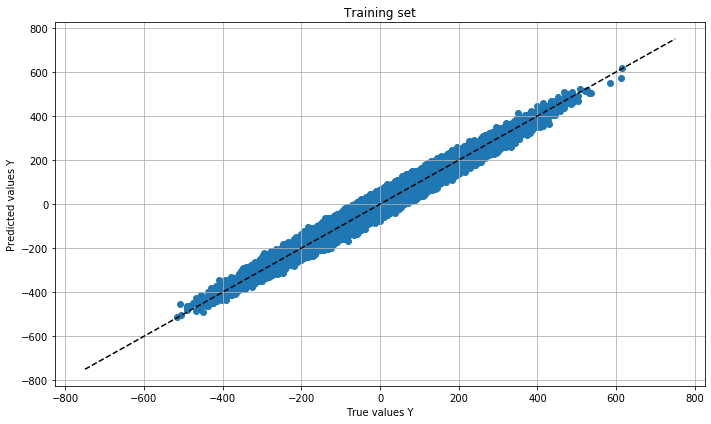

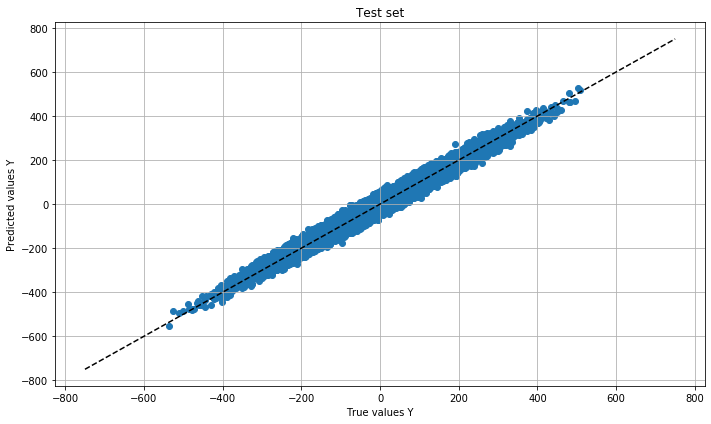

In [ ]:
# Train_set_y
plt.figure(figsize=(10, 6))
plt.title("Training set")
plt.scatter(train_set_y, y_predicted_train)
plt.plot([-750, 750], [-750, 750], "--k")
plt.axis("tight")
plt.grid()
plt.xlabel("True values Y")
plt.ylabel("Predicted values Y")
plt.tight_layout()

# Test_set_y
plt.figure(figsize=(10, 6))
plt.title("Test set")
plt.scatter(test_set_y, y_predicted_test)
plt.plot([-750, 750], [-750, 750], "--k")
plt.axis("tight")
plt.grid()
plt.xlabel("True values Y")
plt.ylabel("Predicted values Y")
plt.tight_layout()

## Статистичні показники для моделі

In [ ]:
# MAE - mean absolute error 
# MSE - mean squared error
# RMSE - root mean squared errod

print("Y values located in range: [", min(test_set_y)[0], ", ", max(test_set_y)[0], "]")

print("MAE: ", metrics.mean_absolute_error(test_set_y, y_predicted_test))
print("MSE: ", metrics.mean_squared_error(test_set_y, y_predicted_test))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(test_set_y, y_predicted_test)))
print("Accuracy for training set: ", model.score(train_set_x, train_set_y))
print("Accuracy for testing set: ", model.score(test_set_x, test_set_y))

Y values located in range: [ -537.31375016136 ,  509.09353413356666 ]
MAE:  15.944227281807025
MSE:  399.36104035859154
RMSE:  19.984019624654884
Accuracy for training set:  0.9783218675128778
Accuracy for testing set:  0.9781960315439467


#### Оскільки значення Y лежать в діапазоні [-500, 533], а значення RMSE досягає 20 (похибка ~3%), модель є досить точною
#### Бачимо, що дані досить добре корельовані, робимо висновок, що модель якісною покаже відповідно гарні результати

## Спробуємо збільшити рівень шуму в даних

In [ ]:
train_set_x, test_set_x, train_set_y, test_set_y = load_regression_data(100)

print(train_set_x.shape, train_set_y.shape, test_set_x.shape, test_set_y.shape)
print("Number of training examples: ", train_set_x.shape[0])
print("Number of testing examples: ", test_set_x.shape[0])

(75000, 29) (75000, 1) (25000, 29) (25000, 1)
Number of training examples:  75000
Number of testing examples:  25000


In [ ]:
model = LinearRegression()
model.fit(train_set_x, train_set_y)

y_predicted_test = model.predict(test_set_x)
y_predicted_train = model.predict(train_set_x)

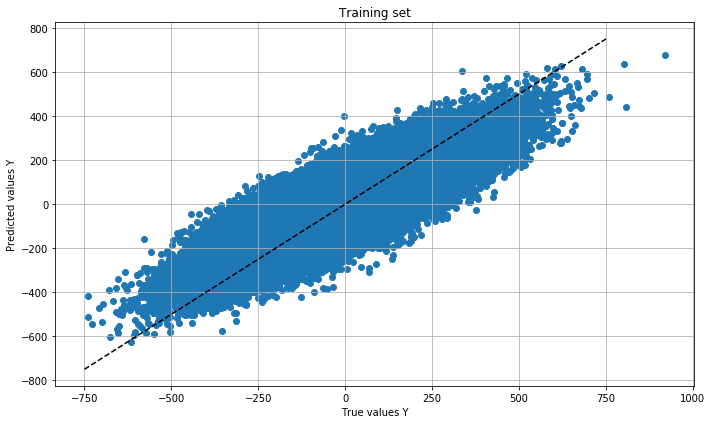

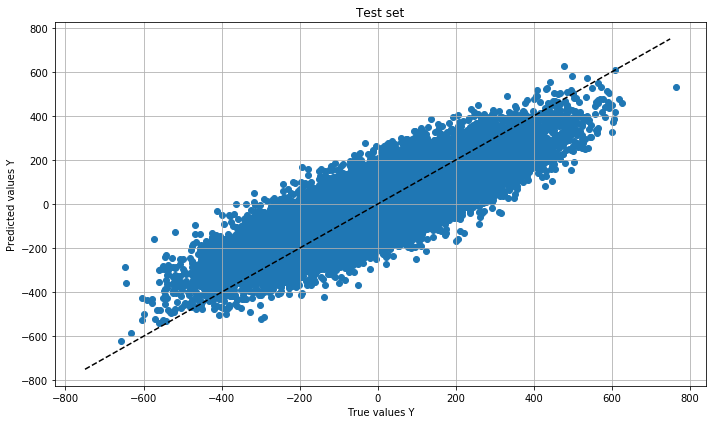

In [ ]:
# Train_set_y
plt.figure(figsize=(10, 6))
plt.title("Training set")
plt.scatter(train_set_y, y_predicted_train)
plt.plot([-750, 750], [-750, 750], "--k")
plt.axis("tight")
plt.grid()
plt.xlabel("True values Y")
plt.ylabel("Predicted values Y")
plt.tight_layout()

# Test_set_y
plt.figure(figsize=(10, 6))
plt.title("Test set")
plt.scatter(test_set_y, y_predicted_test)
plt.plot([-750, 750], [-750, 750], "--k")
plt.axis("tight")
plt.grid()
plt.xlabel("True values Y")
plt.ylabel("Predicted values Y")
plt.tight_layout()

In [ ]:
# MAE - mean absolute error 
# MSE - mean squared error
# RMSE - root mean squared errod

print("Y values located in range: [", min(test_set_y)[0], ", ", max(test_set_y)[0], "]")

print("MAE: ", metrics.mean_absolute_error(test_set_y, y_predicted_test))
print("MSE: ", metrics.mean_squared_error(test_set_y, y_predicted_test))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(test_set_y, y_predicted_test)))
print("Accuracy for training set: ", model.score(train_set_x, train_set_y))
print("Accuracy for testing set: ", model.score(test_set_x, test_set_y))

Y values located in range: [ -658.3471777972024 ,  765.073297167097 ]
MAE:  79.39222752039996
MSE:  9876.163610446802
RMSE:  99.37888915884903
Accuracy for training set:  0.7082398319145295
Accuracy for testing set:  0.7120870140936706


#### Бачимо, що збільшуючи рівень шуму в даних ми зменшуємо точність нашої моделі

# Data for classification

In [ ]:
def load_classification_data(n_feature):
    
    from sklearn.datasets import make_classification
    
    data, target = make_classification(
        n_samples = 200,
        n_features = n_feature,
        n_redundant = 0,
        n_informative = 1,
        n_clusters_per_class = 1
    )
    
    train_set_x, test_set_x, train_set_y, test_set_y = train_test_split(data, target, test_size = 0.2)
    
    return train_set_x, test_set_x, train_set_y, test_set_y
    

In [ ]:
train_set_x, test_set_x, train_set_y, test_set_y = load_classification_data(2)

print(train_set_x.shape, train_set_y.shape, test_set_x.shape, test_set_y.shape)
print("Number of training examples: ", train_set_x.shape[0])
print("Number of testing examples: ", test_set_x.shape[0])

(160, 2) (160,) (40, 2) (40,)
Number of training examples:  160
Number of testing examples:  40


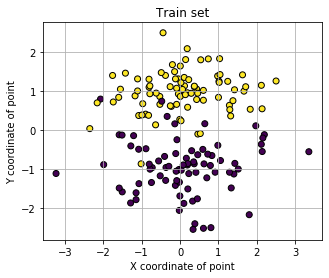

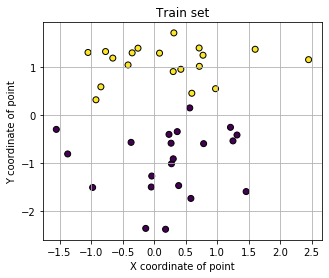

In [ ]:
%matplotlib inline

# Train set
plt.figure(figsize=(5,4))
plt.scatter(train_set_x[:, 0], train_set_x[:, 1], c=train_set_y, edgecolor="k")
plt.grid()
plt.xlabel("X coordinate of point")
plt.ylabel("Y coordinate of point")
plt.title("Train set")
plt.show()

# Train set
plt.figure(figsize=(5,4))
plt.scatter(test_set_x[:, 0], test_set_x[:, 1], c=test_set_y, edgecolor="k")
plt.grid()
plt.xlabel("X coordinate of point")
plt.ylabel("Y coordinate of point")
plt.title("Train set")
plt.show()

In [ ]:
LogRegressor = LogisticRegression()
LogRegressor.fit(train_set_x, train_set_y)
y_predicted_test = LogRegressor.predict(test_set_x)

C:\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Реалізуємо функцію для того щоб переглянути скільки образів модель розпізнає неправильно

In [ ]:
def compare_array(set_x, set_y, y_predicted):
    compare = []
    for i in range(len(set_y)):
        if set_y[i] == y_predicted[i]:
            pass
        else:
            compare.append(set_x[i])
    return np.array(compare)

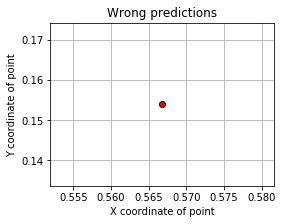

In [ ]:
cmp = compare_array(test_set_x, test_set_y, y_predicted_test)

plt.figure(figsize=(4,3))
plt.scatter(cmp[:, 0], cmp[:, 1], color='red', edgecolor='k')
plt.xlabel("X coordinate of point")
plt.ylabel("Y coordinate of point")
plt.title("Wrong predictions")
plt.grid()
plt.show()

### Статистичні показники моделі

In [ ]:
# AUC - area under the curve 

fpr_train, tpr_train, thresholds_train = metrics.roc_curve(train_set_y, LogRegressor.predict(train_set_x))
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(test_set_y, y_predicted_test)

print("AUC for train: ", metrics.auc(fpr_train, tpr_train))
print("AUC for test: ", metrics.auc(fpr_test, tpr_test))
print("Classification peport: ", classification_report(test_set_y, y_predicted_test))

AUC for train:  0.9496560350218887
AUC for test:  0.9761904761904762
Classification peport:                precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.95      1.00      0.97        19

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



In [ ]:
svm_class = SVC()
svm_class.fit(train_set_x, train_set_y)
y_predicted_test = svm_class.predict(test_set_x)

C:\python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


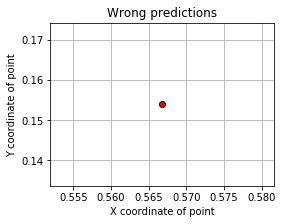

In [ ]:
cmp = compare_array(test_set_x, test_set_y, y_predicted_test)

plt.figure(figsize=(4,3))
plt.scatter(cmp[:, 0], cmp[:, 1], color='red', edgecolor='k')
plt.xlabel("X coordinate of point")
plt.ylabel("Y coordinate of point")
plt.title("Wrong predictions")
plt.grid()
plt.show()

In [ ]:
print("Accuracy: ", metrics.accuracy_score(test_set_y, y_predicted_test))
print("Classification peport: ", classification_report(test_set_y, y_predicted_test))

Accuracy:  0.975
Classification peport:                precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.95      1.00      0.97        19

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



### Отже, в результаті виконання лабораторної роботи було розглянуто та навчено модель лінійної регресії з багатьма змінними, модель логістичної регресії та модель SVM (метод опорних векторів) для класифікації даних